In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('tel_churn.csv')

In [3]:
df.head()

,Unnamed: 0,Account_Length,Area_Code,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Ev_ Mins,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,128,415,0,1,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,Account_Length,Area_Code,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Ev_ Mins,Eve_Calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Creating X and Y variables
x = df.drop('Churn', axis=1)
x

,Account_Length,Area_Code,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Ev_ Mins,Eve_Calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,...,0,0,0,0,0,0,0,0,0,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,...,0,0,0,0,0,0,0,0,1,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,...,0,0,0,0,0,0,0,0,0,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y= df['Churn']
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

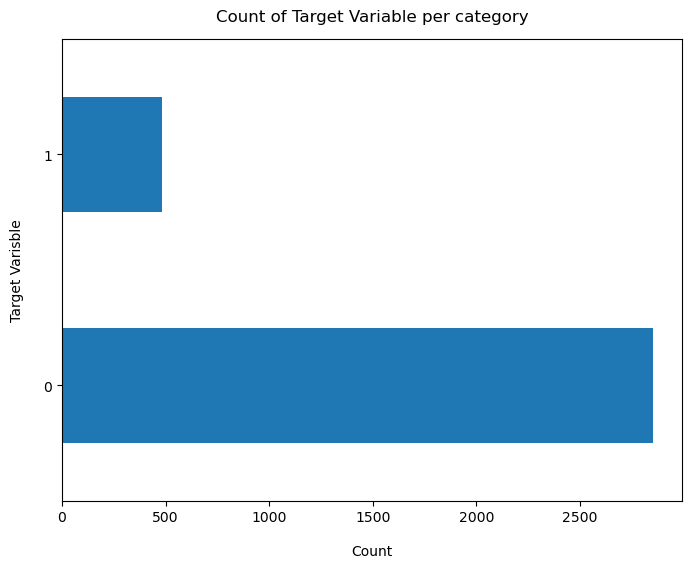

In [8]:
y.value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Varisble", labelpad=14)
plt.title("Count of Target Variable per category", y=1.02);

In [9]:
100*y.value_counts()/len(y) #percentage of customer churn

0    85.508551
1    14.491449
Name: Churn, dtype: float64

In [10]:
#spliting data into train and test sets in ratio 70:30
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=100)

# Decision Tree Classifier

In [11]:
model_dt = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=6, min_samples_leaf=8)

In [12]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [13]:
y_pred = model_dt.predict(x_test)

In [14]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [15]:
acc_dt = round(metrics.accuracy_score(y_test,y_pred)*100,2)
acc_dt

94.7

In [16]:
print(classification_report(y_test, y_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.82      0.73      0.77       122
           0       0.96      0.98      0.97       878

    accuracy                           0.95      1000
   macro avg       0.89      0.85      0.87      1000
weighted avg       0.95      0.95      0.95      1000



In [17]:
#getting low/high precision and recall for minority call 1

In [18]:
print(confusion_matrix(y_test, y_pred))      #confusion matrix for Decision tree

[[858  20]
 [ 33  89]]


In [19]:
## Apply SMOTE + ENN

sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y)

xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.2)

model_dt_smote = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(xr_train, yr_train)

y_pred_smote = model_dt_smote.predict(xr_test)


In [20]:
acc_dt_sm = round(metrics.accuracy_score(yr_test,y_pred_smote)*100,2)
acc_dt_sm

82.56

In [21]:
print(classification_report(yr_test, y_pred_smote, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       327
           1       0.95      0.76      0.84       533

    accuracy                           0.83       860
   macro avg       0.83      0.85      0.82       860
weighted avg       0.86      0.83      0.83       860



In [22]:
print(confusion_matrix(yr_test, y_pred_smote))    #confusion matrix for decision tree after smote

[[307  20]
 [130 403]]


# Random Forest Classifier 

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [25]:
acc_rf = round(metrics.accuracy_score(y_test,y_pred)*100,2)
acc_rf

90.0

In [26]:
print(classification_report(y_test, y_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       1.00      0.18      0.31       122
           0       0.90      1.00      0.95       878

    accuracy                           0.90      1000
   macro avg       0.95      0.59      0.63      1000
weighted avg       0.91      0.90      0.87      1000



In [27]:
print(confusion_matrix(y_test, y_pred))   # confusion matrix for Random Forest

[[878   0]
 [100  22]]


In [28]:
## Apply SMOTE + ENN


sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y)

xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.2)

model_smote_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
model_smote_rf.fit(xr_train, yr_train)

y_pred_smote_rf = model_smote_rf.predict(xr_test)


In [29]:
acc_rf_sm = round(metrics.accuracy_score(yr_test,y_pred_smote_rf)*100,2)
acc_rf_sm

84.68

In [30]:
print(classification_report(yr_test, y_pred_smote_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79       342
           1       0.84      0.93      0.88       526

    accuracy                           0.85       868
   macro avg       0.85      0.83      0.83       868
weighted avg       0.85      0.85      0.84       868



In [31]:
print(confusion_matrix(yr_test, y_pred_smote_rf))   # confusion matrix for Random Forest after smote

[[248  94]
 [ 39 487]]


# Logistic Regression 

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model_lr = LogisticRegression(random_state=50)
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)
y_pred

C:\Users\manan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
acc_lr = round(metrics.accuracy_score(y_test,y_pred)*100,2)
acc_lr

88.0

In [35]:
print(classification_report(y_test, y_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.56      0.08      0.14       122
           0       0.89      0.99      0.94       878

    accuracy                           0.88      1000
   macro avg       0.72      0.54      0.54      1000
weighted avg       0.85      0.88      0.84      1000



In [36]:
print(confusion_matrix(y_test, y_pred))   # confusion matrix for Random Forest

[[870   8]
 [112  10]]


In [37]:
## Apply SMOTE + ENN


sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y)

xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.2)

model_lr_sm = LogisticRegression(random_state=100)
model_lr_sm.fit(xr_train, yr_train)

y_pred_smote_lr = model_lr_sm.predict(xr_test)

C:\Users\manan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
acc_lr_sm = round(metrics.accuracy_score(yr_test,y_pred_smote_lr)*100,2)
acc_lr_sm

70.8

In [39]:
print(classification_report(yr_test, y_pred_smote_lr, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.67      0.46      0.54       327
           1       0.72      0.86      0.79       536

    accuracy                           0.71       863
   macro avg       0.69      0.66      0.66       863
weighted avg       0.70      0.71      0.69       863



In [40]:
print(confusion_matrix(yr_test, y_pred_smote_lr))   # confusion matrix for Random Forest after smote

[[150 177]
 [ 75 461]]


# K-Neighbors Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
model_knc = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # p=2 represents Eucidean distance
model_knc.fit(x_train,y_train)
y_pred = model_knc.predict(x_test)
y_pred

C:\Users\manan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [43]:
acc_knc = round(metrics.accuracy_score(y_test,y_pred)*100,2)
acc_knc

89.0

In [44]:
print(classification_report(y_test, y_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.61      0.27      0.38       122
           0       0.91      0.98      0.94       878

    accuracy                           0.89      1000
   macro avg       0.76      0.62      0.66      1000
weighted avg       0.87      0.89      0.87      1000



In [45]:
print(confusion_matrix(y_test, y_pred))   # confusion matrix for Random Forest

[[857  21]
 [ 89  33]]


In [46]:
## Apply SMOTE + ENN


sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y)

xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.2)

model_knc_sm = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model_knc_sm.fit(xr_train, yr_train)

y_pred_smote_knc = model_knc_sm.predict(xr_test)

C:\Users\manan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [47]:
acc_knc_sm = round(metrics.accuracy_score(yr_test,y_pred_smote_knc)*100,2)
acc_knc_sm

93.65

In [48]:
print(classification_report(yr_test, y_pred_smote_knc, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       332
           1       0.91      1.00      0.95       534

    accuracy                           0.94       866
   macro avg       0.95      0.92      0.93       866
weighted avg       0.94      0.94      0.94       866



In [49]:
print(confusion_matrix(yr_test, y_pred_smote_knc))   # confusion matrix for Random Forest after smote

[[277  55]
 [  0 534]]


# SVM - Support Vector Machine

In [50]:
#pip install svm

In [51]:
from sklearn.svm import SVC

In [52]:
model_svm = SVC(kernel='linear', random_state=50, probability=True)
model_svm.fit(x_train,y_train)
y_pred = model_svm.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [53]:
acc_svm = round(metrics.accuracy_score(y_test,y_pred)*100,2)
acc_svm

88.4

In [54]:
print(classification_report(y_test, y_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.59      0.16      0.25       122
           0       0.89      0.99      0.94       878

    accuracy                           0.88      1000
   macro avg       0.74      0.57      0.59      1000
weighted avg       0.86      0.88      0.85      1000



In [55]:
print(confusion_matrix(y_test, y_pred))   # confusion matrix for Random Forest

[[865  13]
 [103  19]]


In [56]:
## Apply SMOTE + ENN


sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y)

xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.2)

model_svm_sm = SVC(kernel='linear', random_state=50, probability=True)
model_svm_sm.fit(xr_train, yr_train)

y_pred_smote_svm = model_svm_sm.predict(xr_test)

In [57]:
acc_svm_sm = round(metrics.accuracy_score(yr_test,y_pred_smote_svm)*100,2)
acc_svm_sm

89.95

In [58]:
print(classification_report(yr_test, y_pred_smote_svm, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       341
           1       0.97      0.86      0.91       525

    accuracy                           0.90       866
   macro avg       0.89      0.91      0.90       866
weighted avg       0.91      0.90      0.90       866



In [59]:
print(confusion_matrix(yr_test, y_pred_smote_svm))   # confusion matrix for Random Forest after smote

[[329  12]
 [ 75 450]]


## Compare Sevral Models according to their Accuracies

In [60]:
model_comparison = pd.DataFrame({'Model' : ['Decision Tree','Decision Tree smote',
                                            'Random Forest','Random Forest smote',
                                            'Logistic Regression','Logistic Regression smote',
                                            'K-Nearest Neighbor','K-Nearest Neighbor smote',
                                            'Support Vector Machine','Support Vector Machine smote'
                                            ],
                                'Score' : [acc_dt, acc_dt_sm,
                                          acc_rf, acc_rf_sm,
                                          acc_lr, acc_lr_sm,
                                          acc_knc, acc_knc_sm,
                                          acc_svm, acc_svm_sm]})
model_comparison_df = model_comparison.sort_values(by='Score', ascending=False)
model_comparison_df = model_comparison_df.set_index('Score')
model_comparison_df.reset_index()

,Score,Model
0,94.70,Decision Tree
1,93.65,K-Nearest Neighbor smote
2,90.00,Random Forest
3,89.95,Support Vector Machine smote
4,89.00,K-Nearest Neighbor
5,88.40,Support Vector Machine
6,88.00,Logistic Regression
7,84.68,Random Forest smote
8,82.56,Decision Tree smote
9,70.80,Logistic Regression smote


# Saving the Model

In [61]:
import pickle

In [62]:
filename = 'model-2 (Churn).sav'

In [63]:
pickle.dump(model_smote_rf, open(filename, 'wb'))

In [64]:
load_model = pickle.load(open(filename, 'rb'))

In [65]:
load_model.score(xr_test, yr_test)

0.8418013856812933